In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import numpy as np
from scipy import stats
from scipy.stats import pearsonr

In [2]:
level_5 = pd.read_csv('per_moa_performance/level5_beta_moa_performance.csv')
level_5['vae pvalue'] = - np.log(stats.norm.sf(-(level_5['zscore'])))



L1000 = pd.read_csv('../../L1000/3.application/per_moa_performance/L1000_beta_moa_performance.csv').rename(columns = {'pvalue': 'L1000'}).set_index('MOA')
L1000['L1000'] = - np.log(stats.norm.sf(-(L1000['zscore'])))



In [3]:
level_5 = level_5.set_index('MOA').reindex(index=L1000.index).rename(columns = {'vae pvalue': 'level 5'})

In [4]:
combined_df = pd.concat([level_5['level 5'], L1000['L1000']], axis = 1)
combined_df = combined_df.dropna()
# combined_df = combined_df[(np.abs(stats.zscore(combined_df['level 5'])) < 3)]
# combined_df = combined_df[(np.abs(stats.zscore(combined_df['L1000'])) < 3)]


In [5]:
sns.set_theme()

Text(0, 0.5, 'L1000 MOA prediction -log10 p value')

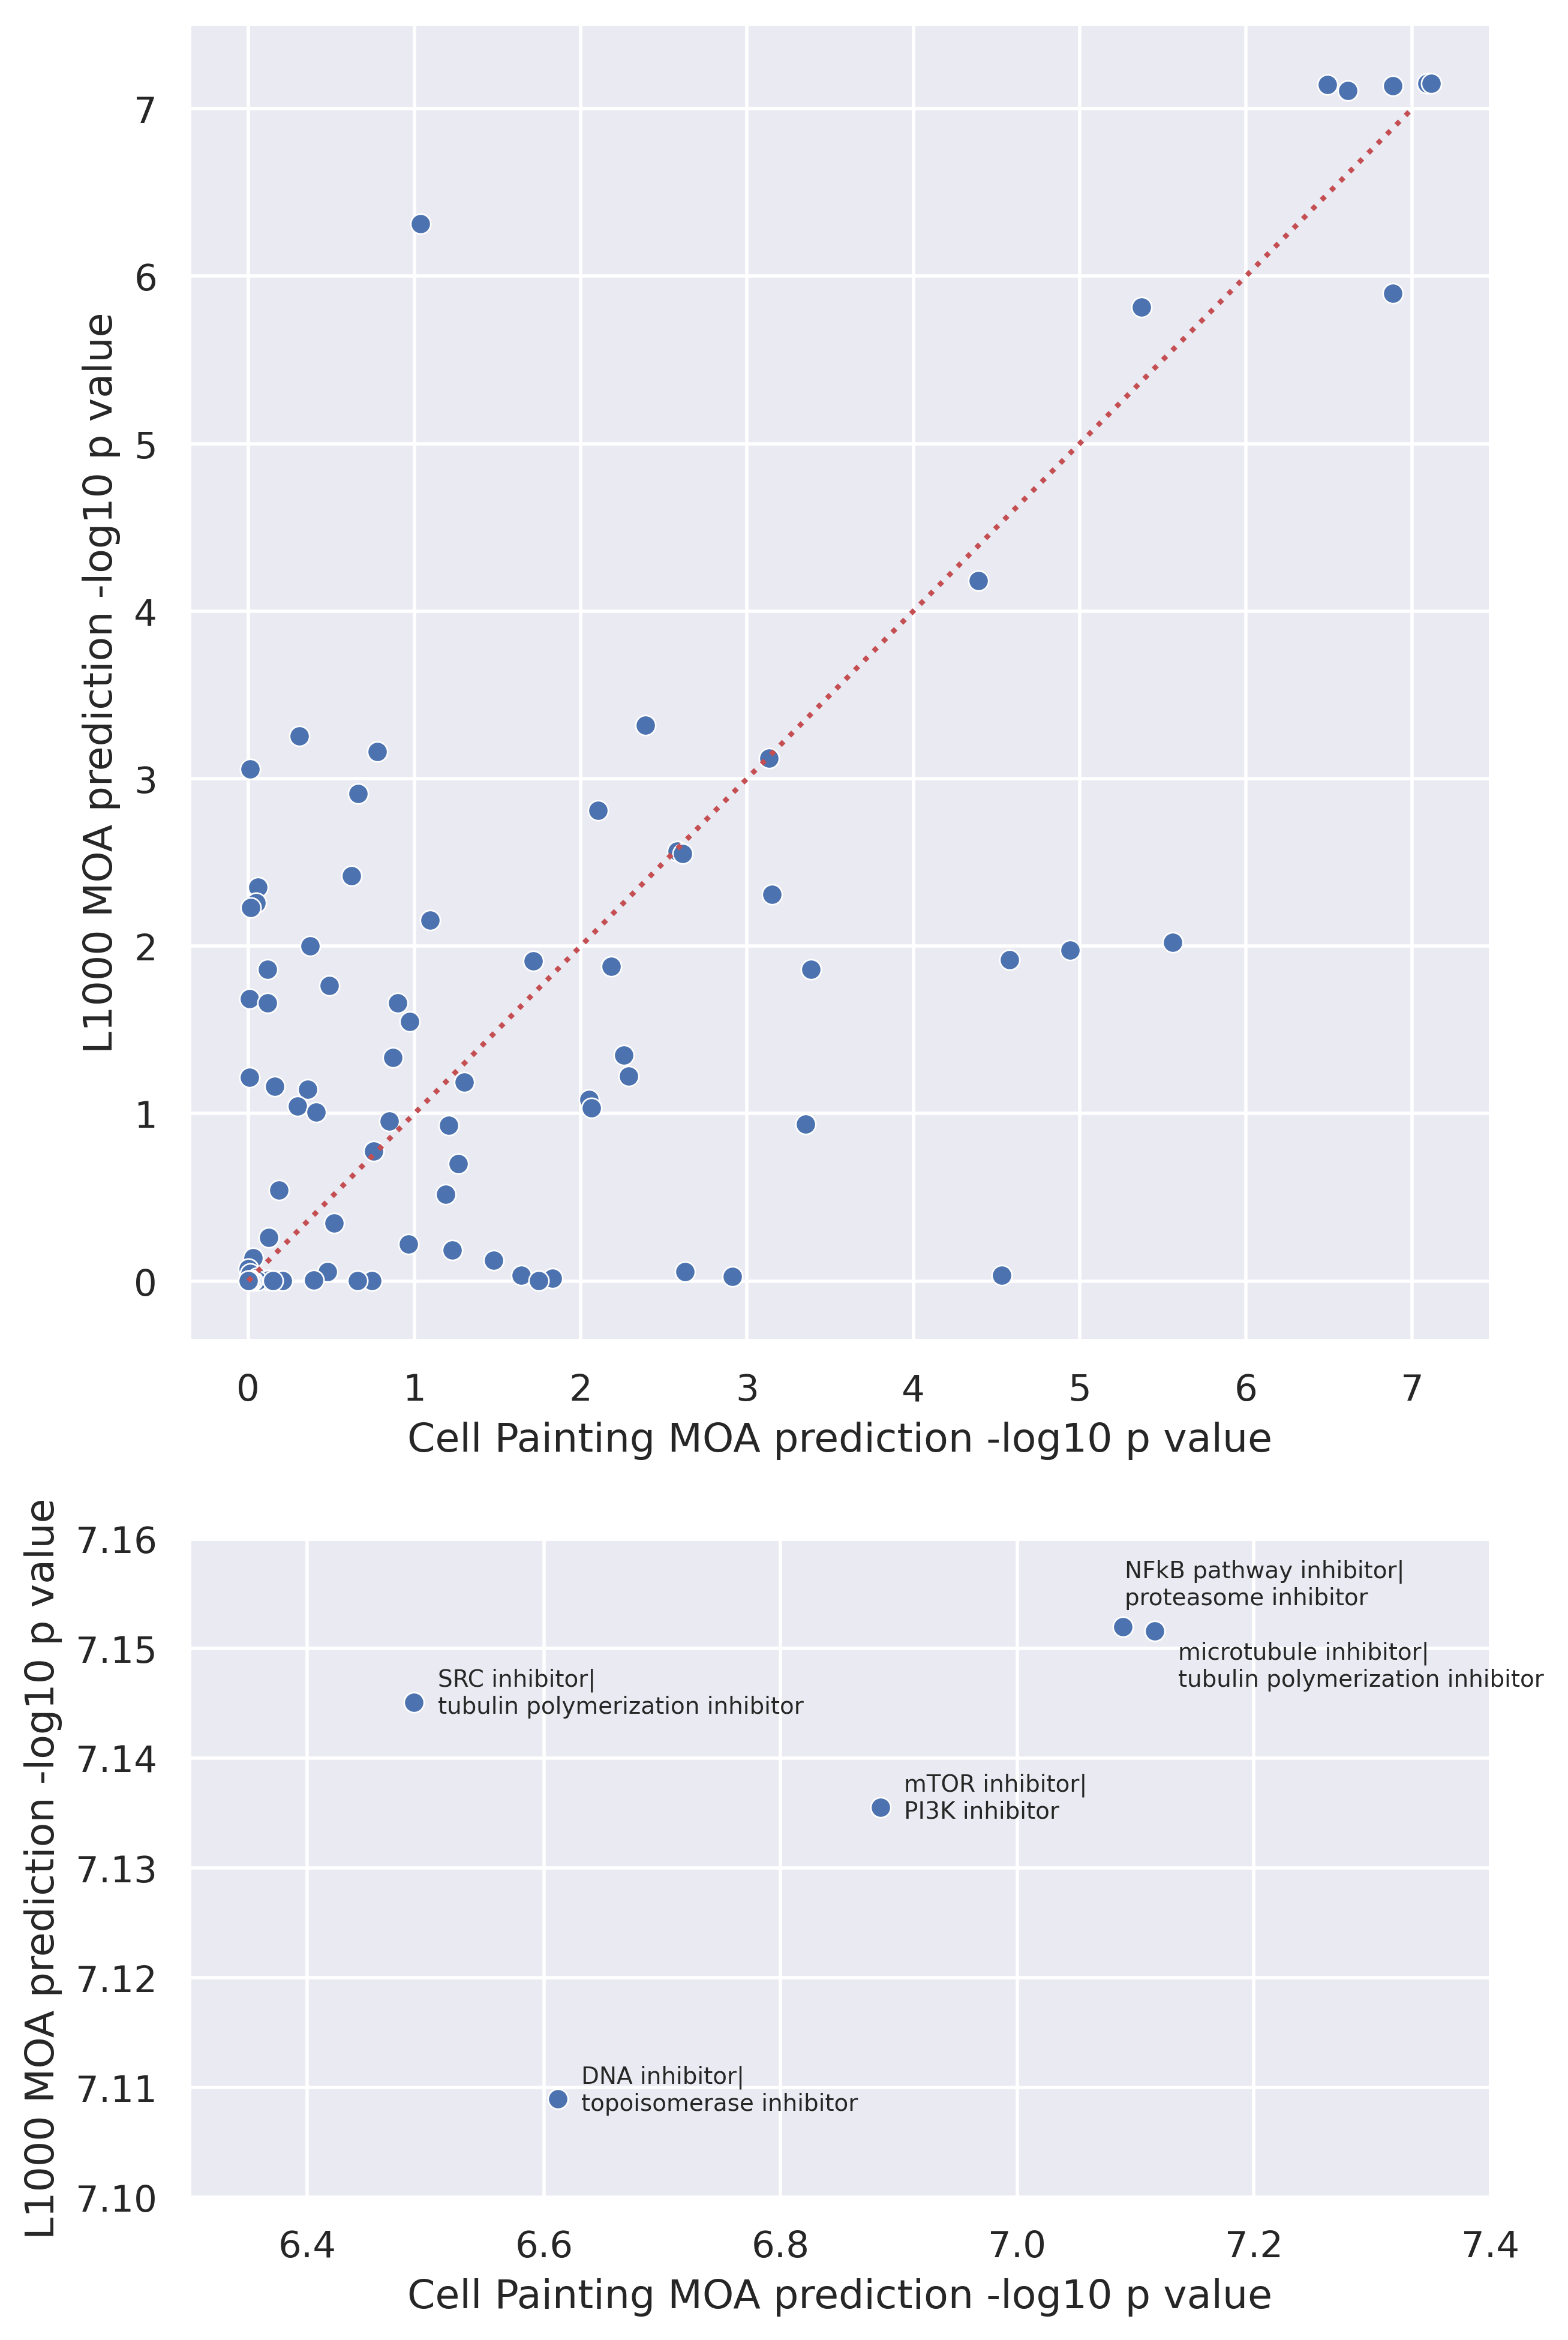

In [16]:

fig, (ax1, ax2) = plt.subplots(2,1,figsize=(7, 12), dpi=400, gridspec_kw={'height_ratios': [2,1]})
# plt.xlim(-25, 60)
# plt.ylim(-100, 50)
m, b = np.polyfit(combined_df['level 5'], combined_df['L1000'], 1)

# plt.plot(combined_df['level 5'], m*combined_df['level 5'] + b, 'r')
ax1.plot(np.arange(0,8), np.arange(0,8), 'r:')

corr, _ = pearsonr(combined_df['level 5'], combined_df['L1000'])

label = "R^2 = " + str(round(corr**2, 2))
sns.scatterplot(ax=ax1, data = combined_df, x = 'level 5', y = 'L1000')
for moa, x, y in zip(combined_df.index, combined_df['level 5'], combined_df['L1000']):
    if (x > 5  and y < 1) or (x < 1 and y > 6):
        moa_formatted = moa.split('|')[0] + '|\n' + moa.split('|')[1]
        x_down = .4
        y_down = .4

        ax1.text(x = x-x_down, y = y-y_down,  s = moa_formatted, size = 7)
ax1.set_xlabel('Cell Painting MOA prediction -log10 p value')
ax1.set_ylabel('L1000 MOA prediction -log10 p value')

sns.scatterplot(ax=ax2, data = combined_df, x = 'level 5', y = 'L1000')
ax2.set_xlim(6.3,7.4)
ax2.set_ylim(7.1,7.16)

for moa, x, y in zip(combined_df.index, combined_df['level 5'], combined_df['L1000']):
    if x > 6.3  and y > 7.1:
        moa_formatted = moa.split('|')[0] + '|\n' + moa.split('|')[1]
        x_down = -.02
        y_down = .001
        if moa == "microtubule inhibitor|tubulin polymerization inhibitor":
            y_down = 0.005
        if moa == "NFkB pathway inhibitor|proteasome inhibitor":
            y_down = -0.002
            x_down = -0.002

        
        ax2.text(x = x-x_down, y = y-y_down,  s = moa_formatted, size = 7)
plt.xlabel('Cell Painting MOA prediction -log10 p value')
plt.ylabel('L1000 MOA prediction -log10 p value')
